'data.frame':	205 obs. of  26 variables:
 $ car_ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ CarName         : chr  "alfa-romero giulia" "alfa-romero stelvio" "alfa-romero Quadrifoglio" "audi 100 ls" ...
 $ fueltype        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration      : chr  "std" "std" "std" "std" ...
 $ doornumber      : chr  "two" "two" "two" "four" ...
 $ carbody         : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drivewheel      : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ enginelocation  : chr  "front" "front" "front" "front" ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ carlength       : num  169 169 171 177 177 ...
 $ carwidth        : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ carheight       : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ enginetype      : chr  "dohc" "dohc" "ohc

     car_ID      symboling         CarName            fueltype        
 Min.   :  1   Min.   :-2.0000   Length:205         Length:205        
 1st Qu.: 52   1st Qu.: 0.0000   Class :character   Class :character  
 Median :103   Median : 1.0000   Mode  :character   Mode  :character  
 Mean   :103   Mean   : 0.8341                                        
 3rd Qu.:154   3rd Qu.: 2.0000                                        
 Max.   :205   Max.   : 3.0000                                        
  aspiration         doornumber          carbody           drivewheel       
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

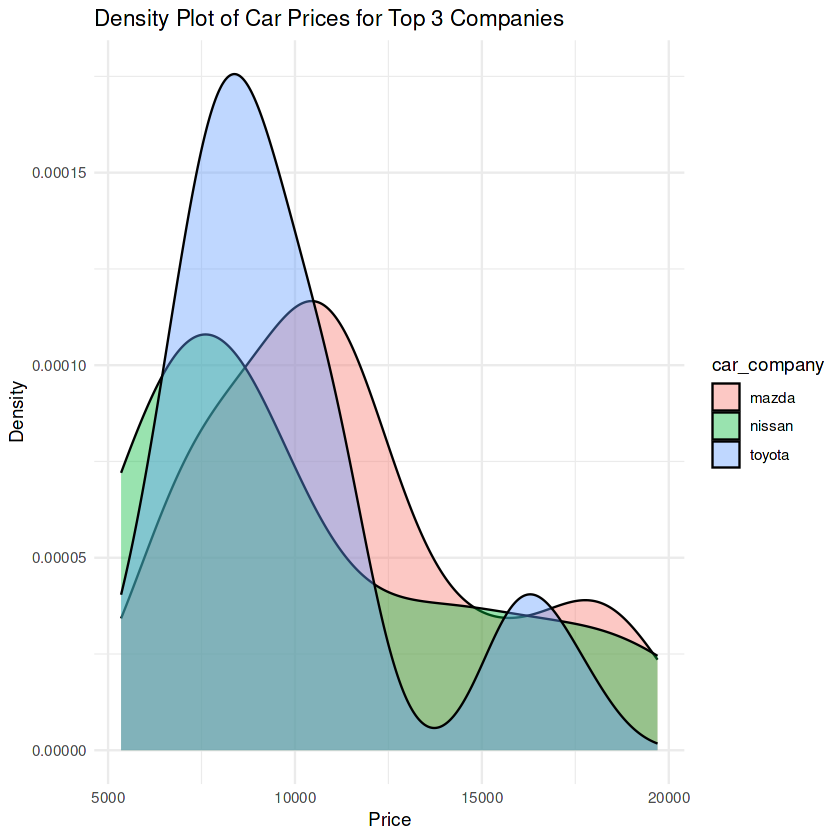

Random Forest R-squared: 0.9484883 


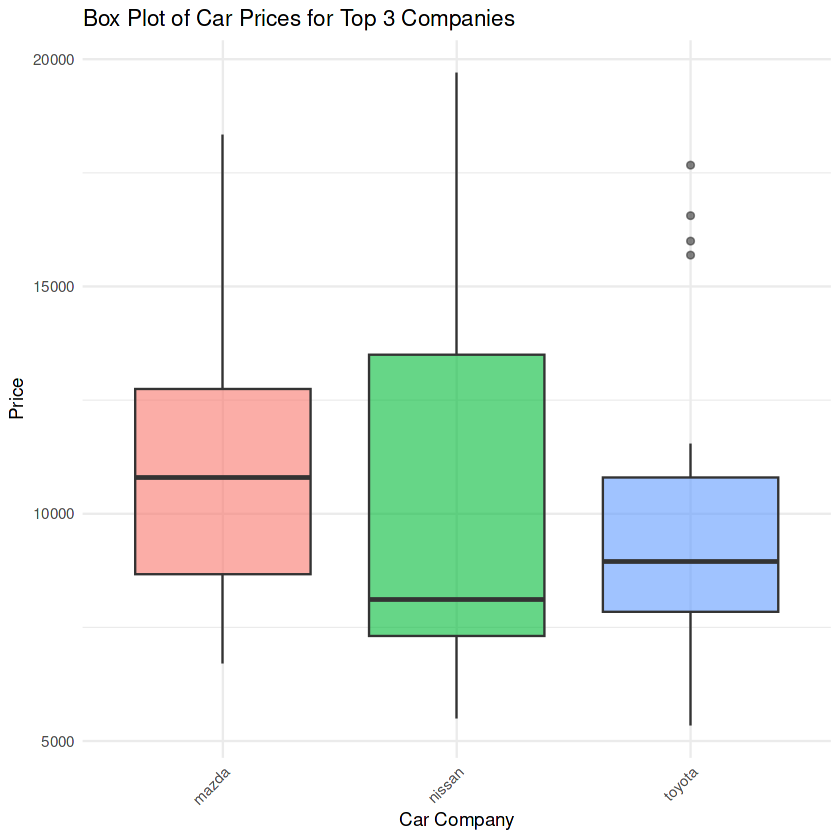

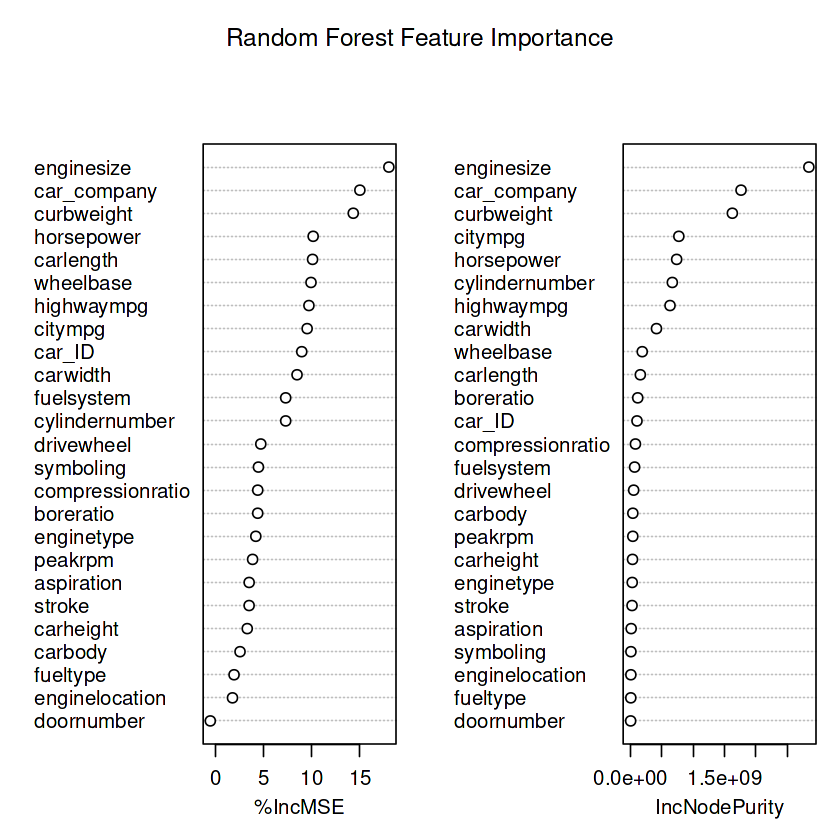

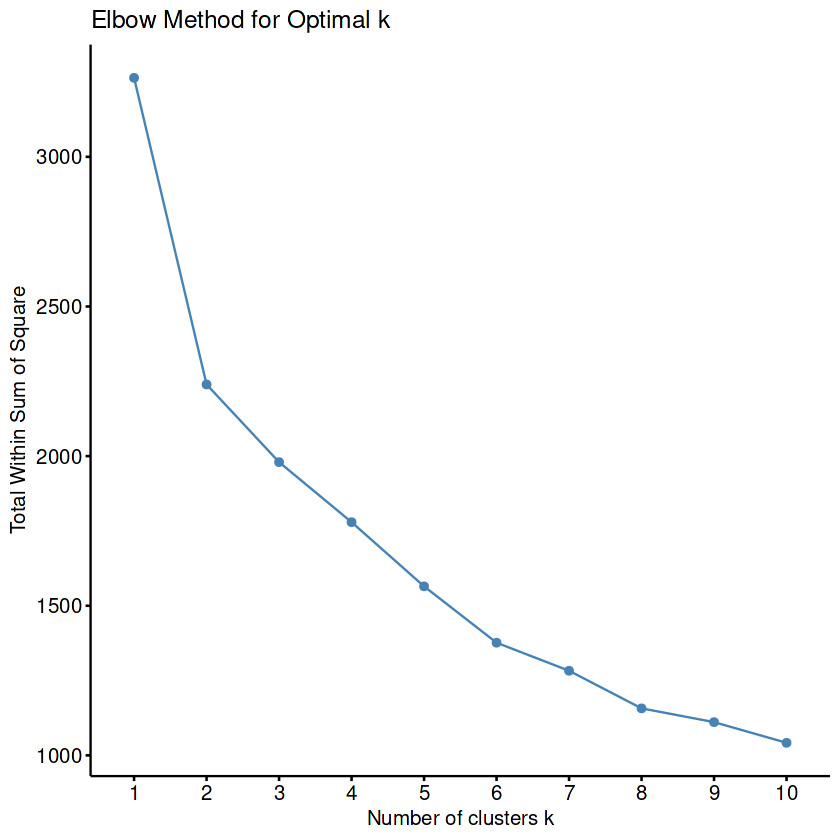

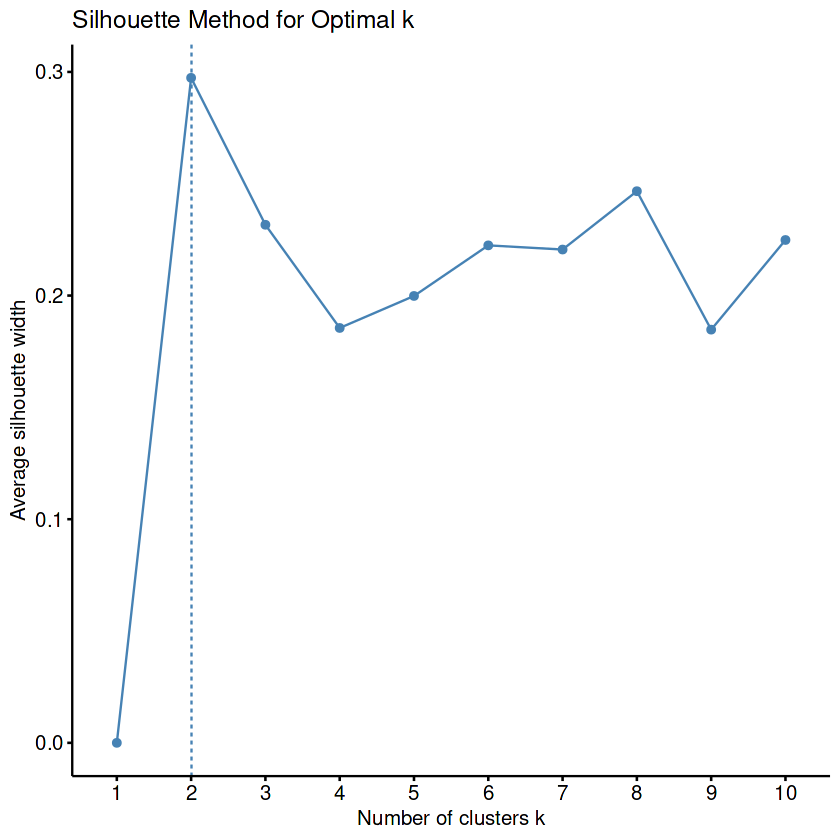

✅ Car Price Prediction + Clustering completed successfully!


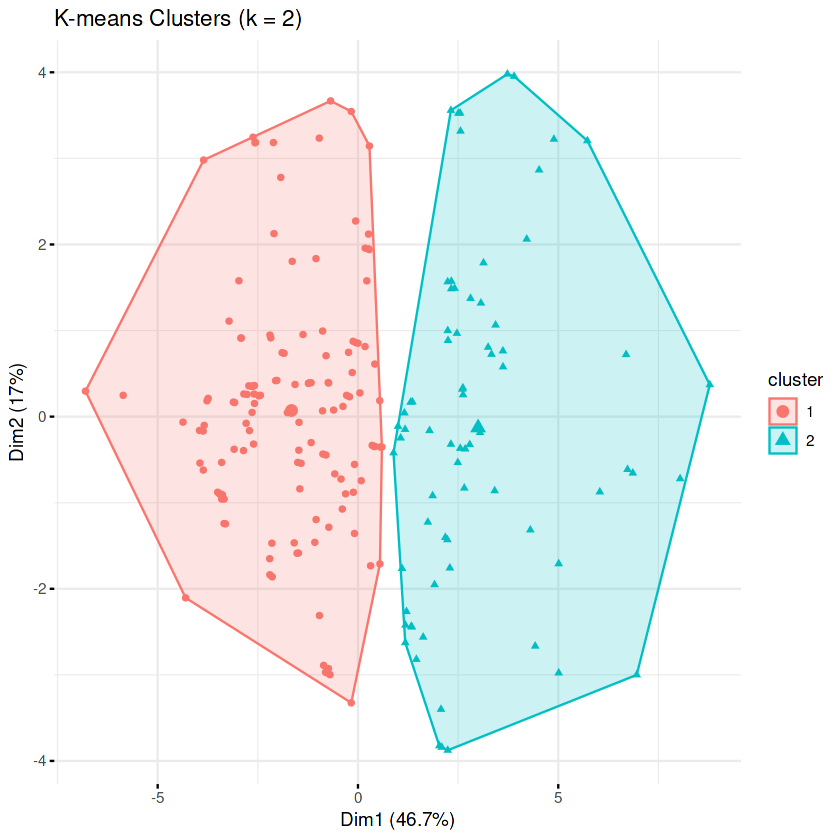

In [3]:
# ===============================
# 📘 Car Price Prediction & Clustering Project
# Dataset: Kaggle Car Price Prediction
# ===============================

# Install and load required libraries
set.seed(123)
required_pkgs <- c("tidyverse", "caret", "randomForest", "GGally",
                   "factoextra", "cluster", "corrplot", "gridExtra")
installed <- rownames(installed.packages())
for (p in required_pkgs) {
  if (!p %in% installed) install.packages(p, dependencies = TRUE)
}

library(tidyverse)
library(caret)
library(randomForest)
library(GGally)
library(factoextra)
library(cluster)
library(corrplot)
library(gridExtra)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(caret))
suppressPackageStartupMessages(library(randomForest))


# ===============================
# 1️⃣ Load Dataset
# ===============================
# Replace with your Kaggle CSV file path
df <- read.csv("/kaggle/input/car-prediction/CarPrice_Assignment.csv")

# Quick look at data
str(df)
summary(df)

# Extract company name from CarName
df$CarName <- as.character(df$CarName)
df$car_company <- sapply(strsplit(df$CarName, " "), function(x) x[1])
df$car_company <- tolower(df$car_company)

# Remove unnecessary columns
df <- df %>% select(-CarName)

# ===============================
# 2️⃣ Handle Missing / Invalid Data
# ===============================
df <- na.omit(df)
df <- df %>% mutate_if(is.character, as.factor)

# ===============================
# 3️⃣ Visualizations: Density + Box Plot
# ===============================

# Top 3 car companies by count
top3_companies <- df %>%
  count(car_company, sort = TRUE) %>%
  top_n(3, n) %>%
  pull(car_company)

df_top3 <- df %>% filter(car_company %in% top3_companies)

# Density plot for top 3 companies
ggplot(df_top3, aes(x = price, fill = car_company)) +
  geom_density(alpha = 0.4) +
  ggtitle("Density Plot of Car Prices for Top 3 Companies") +
  xlab("Price") + ylab("Density") +
  theme_minimal()

# Box plot for top 3 companies
ggplot(df_top3, aes(x = car_company, y = price, fill = car_company)) +
  geom_boxplot(alpha = 0.6) +
  ggtitle("Box Plot of Car Prices for Top 3 Companies") +
  xlab("Car Company") + ylab("Price") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "none")

# ===============================
# 4️⃣ Predictive Modeling (Random Forest)
# ===============================

# Split data into train/test
set.seed(123)
train_indices <- sample(1:nrow(df), 0.8 * nrow(df))
train <- df[train_indices, ]
test <- df[-train_indices, ]

# Train model
rf_model <- randomForest(price ~ ., data = train, importance = TRUE, ntree = 500)

# Predict
pred <- predict(rf_model, test)
cat("Random Forest R-squared:", cor(pred, test$price)^2, "\n")

# Feature Importance Plot
varImpPlot(rf_model, main = "Random Forest Feature Importance")

# ===============================
# 5️⃣ Clustering (K-means)
# ===============================

# Use only numeric columns for clustering
num_df <- df %>% select_if(is.numeric) %>% scale()

# Elbow Method
fviz_nbclust(num_df, kmeans, method = "wss") + ggtitle("Elbow Method for Optimal k")

# Silhouette Method
fviz_nbclust(num_df, kmeans, method = "silhouette") + ggtitle("Silhouette Method for Optimal k")

# Apply K-means (k = 2 based on above)
set.seed(123)
kmeans_result <- kmeans(num_df, centers = 2, nstart = 25)

# Add cluster to dataset
df$cluster <- as.factor(kmeans_result$cluster)

# Visualize clusters (PCA)
fviz_cluster(kmeans_result, data = num_df, geom = "point",
             ellipse.type = "convex", ggtheme = theme_minimal(),
             main = "K-means Clusters (k = 2)")

# ===============================
# ✅ End of Project
# ===============================
cat("✅ Car Price Prediction + Clustering completed successfully!\n")


In [8]:
summary(df)

     car_ID      symboling         fueltype   aspiration  doornumber
 Min.   :  1   Min.   :-2.0000   diesel: 20   std  :168   four:115  
 1st Qu.: 52   1st Qu.: 0.0000   gas   :185   turbo: 37   two : 90  
 Median :103   Median : 1.0000                                      
 Mean   :103   Mean   : 0.8341                                      
 3rd Qu.:154   3rd Qu.: 2.0000                                      
 Max.   :205   Max.   : 3.0000                                      
                                                                    
        carbody   drivewheel enginelocation   wheelbase        carlength    
 convertible: 6   4wd:  9    front:202      Min.   : 86.60   Min.   :141.1  
 hardtop    : 8   fwd:120    rear :  3      1st Qu.: 94.50   1st Qu.:166.3  
 hatchback  :70   rwd: 76                   Median : 97.00   Median :173.2  
 sedan      :96                             Mean   : 98.76   Mean   :174.0  
 wagon      :25                             3rd Qu.:102.40   3r

,Actual_Price,Predicted_Price
,<dbl>,<dbl>
10,17859.17,19620.28
15,24565.00,20245.77
18,36880.00,35804.11
19,5151.00,6575.41
28,8558.00,8580.70
33,5399.00,6391.53
45,8916.50,7439.68
47,11048.00,11998.72
57,11845.00,12331.00


✅ Random Forest R-squared: 0.948 


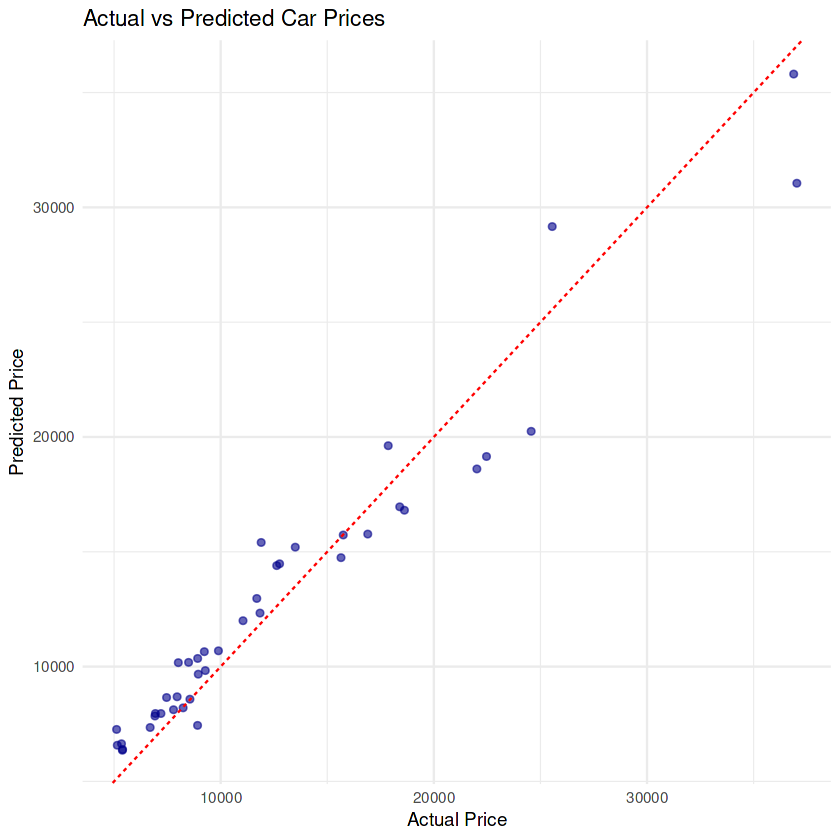

In [9]:
# ===============================
# 🔹 Predict Actual Car Prices
# ===============================

# Predict prices for test data
pred <- predict(rf_model, test)

# Combine actual vs predicted prices
results <- data.frame(
  Actual_Price = test$price,
  Predicted_Price = round(pred, 2)
)

# Show first 10 predictions
head(results, 10)

# Model Accuracy (R-squared)
r2 <- cor(pred, test$price)^2
cat("✅ Random Forest R-squared:", round(r2, 3), "\n")

# ===============================
# 🔹 Visualization: Actual vs Predicted Prices
# ===============================

ggplot(results, aes(x = Actual_Price, y = Predicted_Price)) +
  geom_point(color = "darkblue", alpha = 0.6) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  ggtitle("Actual vs Predicted Car Prices") +
  xlab("Actual Price") + ylab("Predicted Price") +
  theme_minimal()
